In [66]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

titanic=pd.read_excel("titanic.xls")
titanic.describe ##decrire la base 
titanic.head    ##afficher l'entet 
titanic.shape  ## afficher la taille 

tita=titanic.drop(['name','sibsp','parch','ticket','fare','cabin','embarked','boat','body','home.dest'],axis=1)
tita.describe()
# tita.fillna(tita['age'].mean())) ## on peut remplacer les donnees manquantes d'age  par l'age moyen
tita=tita.dropna(axis=0) ##eleminer les donnees vides 
tita.shape

tita['pclass'].value_counts() ##calculer les nombre d'appritions des nombres de classes 
#tita['pclass'].value_counts().plot.bar() ##tracer ces elements 
#tita['age'].hist()
tita.groupby(['sex']).mean() ##analyser par groupe
age_mineure=tita[(tita['sex']=='male') & (tita['age']<18)] ##selectionner les passagers mineures  et hommes
age_mineure
agee=age_mineure.iloc[0:50,0:2] ##recuperer les 50 premiere ligne et les 2 premiere colonnees(indexing ligne)
age2=tita.loc[0:50,['age','sex']] #faire de l'indexing sur des colonnes (indexing colonnes)
age2

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female
3,30.0000,male
4,25.0000,female
5,48.0000,male
6,63.0000,female
7,39.0000,male
8,53.0000,female
9,71.0000,male


                    Open          High          Low         Close  \
Date                                                                
2020-09-01   9783.763672  10126.694336  9714.031250  10038.563477   
2020-09-02  10033.820313  10033.820313  9539.772461   9634.128906   
2020-09-03   9628.353516   9667.351563  8598.745117   8653.382813   
2020-09-04   8640.771484   9002.076172  8653.526367   8879.717773   
2020-09-05   8880.323242   8938.644531  8402.324219   8590.609375   

               Adj Close        Volume  
Date                                    
2020-09-01  10038.563477  2.290374e+10  
2020-09-02   9634.128906  2.366525e+10  
2020-09-03   8653.382813  2.696640e+10  
2020-09-04   8879.717773  2.531265e+10  
2020-09-05   8590.609375  3.794268e+10  


C:\Users\Packard Bell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
C:\Users\Packard Bell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.


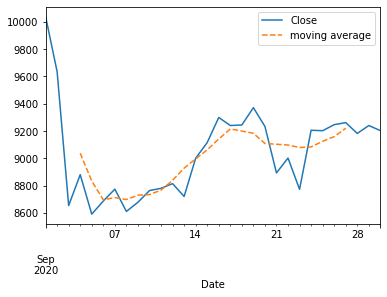

In [24]:
###################### pandas Time series ######################
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt 
import pandas as pd

bitcoin=pd.read_csv('bitcoin.csv',index_col="Date",parse_dates=True) ##telecharger la base et changer l'index par la date bitcoin.head()
#bitcoin['Close'].plot(figsize=(9,6)) ##afficher l'evolution d'une variable 
print(bitcoin.head())
bitcoin.index     ##afficher tout les index 
#bitcoin['2021']['Close'].plot() ##afficher l'evolution du bitcoin en 2021 
#bitcoin['2021-02']['Close'].plot() ##afficher l'evolution du bitcoin en  fevrier 2021 
#bitcoin['2020':'2021']['Close'].plot() ##afficher l'evolution du bitcoin entre la periode 2020 a 2021
#bitcoin['2021']['Close'].resample('w').mean().plot(label="moyenne par mois",c='g') ##regrouper la moyen du bitcoin par semaine(w)
#bitcoin['2021']['Close'].resample('M').std().plot(label="moyenne par ecart ",c='b') ##regrouper la moyen du bitcoin par mois(M)

fig1=plt.figure()
bitcoin['2020-09']['Close'].plot(label="Close")
bitcoin['2020-09']['Close'].rolling(window=7,center=True).mean().plot(label="moving average",ls="--")## moyene mobile en generale 
plt.legend() ## ca permet de calculer des statsitique y as tois type SMA , EMA(ewm) , CMA
plt.show()

<AxesSubplot:>

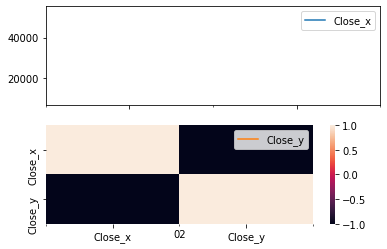

In [3]:
import pandas as pd
import seaborn as sns

bitcoin=pd.read_csv('bitcoin.csv',index_col="Date",parse_dates=True)
eth=pd.read_csv("ether.csv",index_col="Date",parse_dates=True)
eth.head()
btc_eth=pd.merge(bitcoin,eth,on='Date',how="inner")
btc_eth.head()
btc_eth[['Close_x','Close_y']].plot(subplots=True) ##on n'as pas la meme echelle du coup on utulise subplot=true 
corra=btc_eth[['Close_x','Close_y']].corr() ##correlation entre bitcoin et etheriuem 77%
sns.heatmap(corra.corr())